# Profiling optimization algorithms

- by Cade Parkison

Comparison of nonlinear optimization algorithms. Profiling done by cProfile and IPython magic functions

---

In [1]:
from duct_pso_v2 import solve as pso_solve
from duct_pso_v2 import dimensions, cost
from duct_v01 import t_solve

In [2]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cProfile

In [3]:
%matplotlib inline

---
## Parameters

In [4]:
params = [.7, 2, 2]
n = 2
max_iter = 100
dim = 2

xmax = np.array([0.7, 1.0])
xmin = np.array([0.1, 0.25])

x0 = np.array([0.5, 0.5])

---
## PSO 

In [7]:
def pso():
    res = pso_solve(params, n, max_iter, cost, dim, xmin, xmax)

In [5]:
%%timeit
res = pso_solve(params, n, max_iter, cost, dim, xmin, xmax)

10 loops, best of 3: 49.6 ms per loop


In [8]:
time_pso = %timeit -r 10 -o pso

10000000 loops, best of 10: 21.2 ns per loop


In [20]:
cProfile.run('pso()')

         15505 function calls in 0.060 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.060    0.060 <ipython-input-7-b6498f090d96>:1(pso)
        1    0.000    0.000    0.060    0.060 <string>:1(<module>)
     1307    0.020    0.000    0.051    0.000 duct_pso_v2.py:122(dimensions)
        2    0.000    0.000    0.000    0.000 duct_pso_v2.py:235(__init__)
     7838    0.016    0.000    0.016    0.000 duct_pso_v2.py:24(diam)
        1    0.003    0.003    0.060    0.060 duct_pso_v2.py:252(solve)
        1    0.000    0.000    0.000    0.000 duct_pso_v2.py:308(<listcomp>)
     3921    0.015    0.000    0.015    0.000 duct_pso_v2.py:39(p_loss)
     1307    0.004    0.000    0.056    0.000 duct_pso_v2.py:64(cost)
      148    0.000    0.000    0.001    0.000 function_base.py:894(copy)
        3    0.000    0.000    0.000    0.000 random.py:84(__init__)
        3    0.000    0.000    0.000    0.00

---
## T-Method 

In [10]:
%%timeit 
t_solve()

100 loops, best of 3: 5.82 ms per loop


In [9]:
time_t_method = %timeit -r 10 -o t_solve

100000000 loops, best of 10: 19.2 ns per loop


In [12]:
cProfile.run('t_solve')

         3 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




---
 
# [Nelder-Mead Simplex](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)

In [13]:
res = minimize(cost, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 3617.010886
         Iterations: 62
         Function evaluations: 117


In [14]:
def nelder_mead():
    x0 = np.array([0.5, 0.5])
    res = minimize(cost, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

In [15]:
%%timeit
nelder_mead()

Optimization terminated successfully.
         Current function value: 3617.010886
         Iterations: 62
         Function evaluations: 117
Optimization terminated successfully.
         Current function value: 3617.010886
         Iterations: 62
         Function evaluations: 117
Optimization terminated successfully.
         Current function value: 3617.010886
         Iterations: 62
         Function evaluations: 117
Optimization terminated successfully.
         Current function value: 3617.010886
         Iterations: 62
         Function evaluations: 117
Optimization terminated successfully.
         Current function value: 3617.010886
         Iterations: 62
         Function evaluations: 117
Optimization terminated successfully.
         Current function value: 3617.010886
         Iterations: 62
         Function evaluations: 117
Optimization terminated successfully.
         Current function value: 3617.010886
         Iterations: 62
         Function evaluations: 117
Optimi

In [16]:
time_nelder_mead = %timeit -o nelder_mead

100000000 loops, best of 3: 18 ns per loop


In [17]:
cProfile.run('nelder_mead()')

Optimization terminated successfully.
         Current function value: 3617.010886
         Iterations: 62
         Function evaluations: 117
         2437 function calls in 0.015 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.015    0.015 <ipython-input-14-5b4ee6aca9d2>:1(nelder_mead)
        1    0.000    0.000    0.015    0.015 <string>:1(<module>)
       63    0.000    0.000    0.001    0.000 _methods.py:25(_amax)
        1    0.000    0.000    0.000    0.000 _methods.py:28(_amin)
        1    0.000    0.000    0.000    0.000 _methods.py:37(_any)
        1    0.000    0.000    0.015    0.015 _minimize.py:36(minimize)
      117    0.004    0.000    0.008    0.000 duct_pso_v2.py:122(dimensions)
      700    0.002    0.000    0.002    0.000 duct_pso_v2.py:24(diam)
      351    0.002    0.000    0.002    0.000 duct_pso_v2.py:39(p_loss)
      117    0.001    0.000    0.009    0.000 duct_pso_

---
# [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)

- not working

In [ ]:
def bfgs():
    x0 = np.array([0.5, 0.5])
    res = minimize(cost, x0, method='BFGS', jac=False, options={'disp': True})

In [ ]:
bfgs()

---

# Results

In [21]:
timeit_times = (time_pso, time_t_method, time_nelder_mead)
timeit2_times = (49.6, 5.82, 6.45)
cprofile_times = (55, 15, 0 )

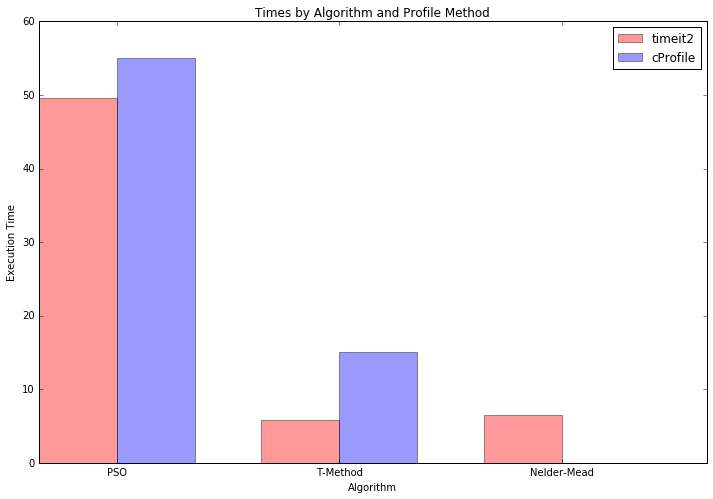

In [29]:
n_algorithms = 3

fig, ax = plt.subplots(figsize=(10,7))


index = np.arange(n_algorithms)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

#rects1 = plt.bar(index, timeit_times, bar_width,
#                 alpha=opacity,
#                 color='b',
#                 label='timeit')

rects2 = plt.bar(index, timeit2_times, bar_width,
                 alpha=opacity,
                 color='r',
                 label='timeit2')

rects3 = plt.bar(index + bar_width , cprofile_times, bar_width,
                 alpha=opacity,
                 color='b',
                 label='cProfile')

plt.xlabel('Algorithm')
plt.ylabel('Execution Time')
plt.title('Times by Algorithm and Profile Method')
plt.xticks(index + bar_width, ('PSO', 'T-Method', 'Nelder-Mead'))
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots

---
# References

[1] [scipy documentation](http://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/optimize.html)